In [ ]:
import os
os.chdir('..')
from utils import *
import shutil

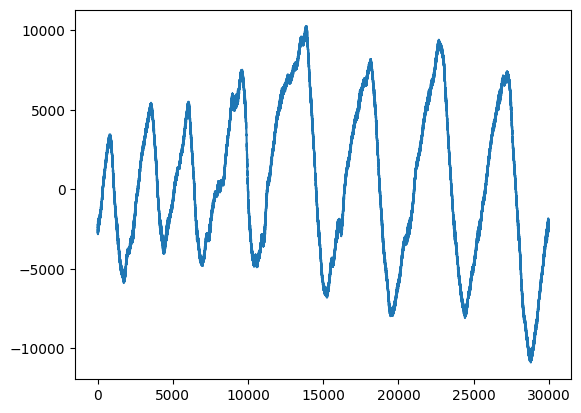

In [23]:
import matplotlib.pyplot as plt
import numpy as np
sniff = np.load(sniff_paths[0])
plt.plot(sniff[:30000])
plt.show()

In [15]:
root_path = 'D:/data/'
experiment = 'clickbait-odor-alpha'
session_type = 'o'

# Get paths to relevant files
sniff_paths = get_file_paths(f"{root_path}/{experiment}", extension='npy', keyword='sniff', session_type=session_type, print_paths=True, print_n=3)
spike_paths = get_file_paths(f"{root_path}/{experiment}", extension='npy', keyword='spike_times', session_type=session_type, print_paths=True, print_n=3)
clust_paths = get_file_paths(f"{root_path}/{experiment}", extension='npy', keyword='spike_clusters', session_type=session_type, print_paths=True, print_n=3)
cl_info_paths = get_file_paths(f"{root_path}/{experiment}", extension='tsv', keyword='cluster_info', session_type=session_type, print_paths=True, print_n=3)
events_paths = get_file_paths(f"{root_path}/{experiment}", extension='csv', keyword='events', session_type=session_type, keyword_exact=True, print_paths=True, print_n=np.inf)

Found 12 sniff.npy files
0 D:\data\clickbait-odor-alpha\preprocessed\7001\o1\sniff.npy
1 D:\data\clickbait-odor-alpha\preprocessed\7001\o2\sniff.npy
2 D:\data\clickbait-odor-alpha\preprocessed\7001\o3\sniff.npy
Found 12 spike_times.npy files
0 D:\data\clickbait-odor-alpha\kilosorted\7001\o1\spike_times.npy
1 D:\data\clickbait-odor-alpha\kilosorted\7001\o2\spike_times.npy
2 D:\data\clickbait-odor-alpha\kilosorted\7001\o3\spike_times.npy
Found 12 spike_clusters.npy files
0 D:\data\clickbait-odor-alpha\kilosorted\7001\o1\spike_clusters.npy
1 D:\data\clickbait-odor-alpha\kilosorted\7001\o2\spike_clusters.npy
2 D:\data\clickbait-odor-alpha\kilosorted\7001\o3\spike_clusters.npy
Found 12 cluster_info.tsv files
0 D:\data\clickbait-odor-alpha\kilosorted\7001\o1\cluster_info.tsv
1 D:\data\clickbait-odor-alpha\kilosorted\7001\o2\cluster_info.tsv
2 D:\data\clickbait-odor-alpha\kilosorted\7001\o3\cluster_info.tsv
Found 12 events.csv files
0 D:\data\clickbait-odor-alpha\bonsai\7001\o1\events.csv
1 D

In [ ]:
# Filter paths to ensure they correspond to the same sessions
spike_paths = filter_paths(spike_paths, sniff_paths)
clust_paths = filter_paths(clust_paths, sniff_paths)
cl_info_paths = filter_paths(cl_info_paths, sniff_paths)
sniff_paths = filter_paths(sniff_paths, spike_paths)
events_paths = filter_paths(events_paths, spike_paths)
print(len(sniff_paths), len(spike_paths), len(clust_paths), len(cl_info_paths))

12 12 12 12


In [25]:
for ii, path in enumerate(events_paths):
    session_id = path.parent.name
    mouse_id = path.parent.parent.name
    dest_dir = Path(f"{root_path}/{experiment}/for_matt/{mouse_id}/{session_id}")
    dest_dir.mkdir(parents=True, exist_ok=True)
    
    shutil.copy(sniff_paths[ii], os.path.join(dest_dir, 'sniff.npy'))
    shutil.copy(spike_paths[ii], os.path.join(dest_dir, 'spike_times.npy'))
    shutil.copy(clust_paths[ii], os.path.join(dest_dir, 'spike_clusters.npy'))
    shutil.copy(cl_info_paths[ii], os.path.join(dest_dir, 'cluster_info.tsv'))
    shutil.copy(events_paths[ii], os.path.join(dest_dir, 'events.csv'))
    print(f"Copied files for {mouse_id}-{session_id} to {dest_dir}")

Copied files for 7001-o1 to D:\data\clickbait-odor-alpha\for_matt\7001\o1
Copied files for 7001-o2 to D:\data\clickbait-odor-alpha\for_matt\7001\o2
Copied files for 7001-o3 to D:\data\clickbait-odor-alpha\for_matt\7001\o3
Copied files for 7001-o4 to D:\data\clickbait-odor-alpha\for_matt\7001\o4
Copied files for 7003-o1 to D:\data\clickbait-odor-alpha\for_matt\7003\o1
Copied files for 7003-o2 to D:\data\clickbait-odor-alpha\for_matt\7003\o2
Copied files for 7003-o3 to D:\data\clickbait-odor-alpha\for_matt\7003\o3
Copied files for 7003-o4 to D:\data\clickbait-odor-alpha\for_matt\7003\o4
Copied files for 7004-o1 to D:\data\clickbait-odor-alpha\for_matt\7004\o1
Copied files for 7004-o2 to D:\data\clickbait-odor-alpha\for_matt\7004\o2
Copied files for 7004-o3 to D:\data\clickbait-odor-alpha\for_matt\7004\o3
Copied files for 7004-o4 to D:\data\clickbait-odor-alpha\for_matt\7004\o4


In [ ]:
shutil.unlink(events_paths[ii], os.path.join(dest_dir, 'events.csv'))